# Financial Planning App

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
#Make sure my .env file is being located:
load_dotenv('alpaca_key.env')

#Alpaca API Object
api_key = os.getenv('ALPACA_API_KEY')
secret_key = os.getenv('ALPACA_SECRET_KEY')

alpaca = tradeapi.REST(
    api_key,
    secret_key,
    api_version = "v2"
)

In [3]:
#Variables
my_btc= 1.2
my_eth = 5.3

#Alertnative Coin URL for API Call
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [4]:
#Getting data from API
request_btc = requests.get(btc_url)
request_eth = requests.get(eth_url)

response_btc = request_btc.json()
response_eth = request_eth.json()

print(json.dumps(response_btc, indent=4))
print(json.dumps(response_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19522350,
            "total_supply": 19522350,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 35117.0,
                    "volume_24h": 44023309330,
                    "market_cap": 669930391714,
                    "percentage_change_1h": 4.19947600713025,
                    "percentage_change_24h": 15.9951458153895,
                    "percentage_change_7d": 23.7497722033012,
                    "percent_change_1h": 4.19947600713025,
                    "percent_change_24h": 15.9951458153895,
                    "percent_change_7d": 23.7497722033012
                }
            },
            "last_updated": 1698114589
        }
    },
    "metadata": {
        "timestamp": 1698114589,
        "num_cryptocur

In [10]:
btc_price = response_btc['data']['1']['quotes']['USD']['price']
my_total_btc = btc_price * my_btc
print(my_total_btc)
eth_price = response_eth['data']['1027']['quotes']['USD']['price']
my_total_eth = eth_price * my_eth
print(my_total_eth)

42140.4
9657.607


In [6]:
#Created variables to retrieve Alpaca API Data for SPY and AGG
my_agg = 200
my_spy = 50

#Setting 'SPY' and 'AGG' ticker
ticker = ['SPY', 'AGG']

#Setting the timefram to 1 day
timeframe = "1day"

#Setting start and end datetimes of 1 year now and between 365 days later
start_date = pd.Timestamp("2021-10-20", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-20", tz = "America/New_York").isoformat()

#Get 1 year's worth of historical data
df_ticker = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

#Reorganizeing the Dataframes
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

#Concatenating ticker Dataframes
df_ticker = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])

df_ticker.head(18)

SPY                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2021-10-20 04:00:00+00:00  452.41  452.7320  451.0100      371076  451.13   
2021-10-21 04:00:00+00:00  453.59  453.8290  451.3100      315671  451.77   
2021-10-22 04:00:00+00:00  453.12  454.6700  451.0500      493812  453.13   
2021-10-25 04:00:00+00:00  455.55  455.9000  452.3900      346373  454.28   
2021-10-26 04:00:00+00:00  455.96  458.4900  455.5600      459690  457.20   
2021-10-27 04:00:00+00:00  453.94  457.1600  453.8600      442832  456.45   
2021-10-28 04:00:00+00:00  458.32  458.4000  455.4500      361423  455.46   
2021-10-29 04:00:00+00:00  459.25  459.5600  455.5600      435113  455.87   
2021-11-01 04:00:00+00:00  460.04  460.7021  458.2000      408114  460.30   
2021-11-02 04:00:00+00:00  461.90  462.2300  460.0800      342321  460.22   
2021-11-03 04:00:00+00:00  464.72  465.1500  460.8300      427385  461.30   
2021-11-04 04:00:00+00:00  466.91  467.0000  464.9900      386860  465.36   
2021-11-05 04:00:00+00:00  468.53  470.6500  466.9200      493081  469.28   
2021-11-08 05:00:00+00:00  468.93  470.2300  468.2031      354647  469.70   
2021-11-09 05:00:00+00:00  467.38  469.5700  465.8800      461992  469.32   
2021-11-10 05:00:00+00:00  463.62  467.3800  462.0400      556478  465.58   
2021-11-11 05:00:00+00:00  463.77  465.2900  463.7500      282342  465.21   
2021-11-12 05:00:00+00:00  467.27  467.8600  464.1100      343636  465.12   

                                                    AGG                      \
                             volume        vwap   close      high       low   
timestamp                                                                     
2021-10-20 04:00:00+00:00  50871680  451.920785  114.08  114.2900  114.0600   
2021-10-21 04:00:00+00:00  42397570  452.511402  113.84  114.0400  113.8400   
2021-10-22 04:00:00+00:00  59430753  453.037653  114.06  114.1399  113.8950   
2021-10-25 04:00:00+00:00  46427004  454.648023  114.17  114.2700  114.0600   
2021-10-26 04:00:00+00:00  57470445  456.853417  114.38  114.3800  114.1100   
2021-10-27 04:00:00+00:00  73588516  455.201363  114.76  114.9150  114.4250   
2021-10-28 04:00:00+00:00  52962903  456.878880  114.67  114.8250  114.5700   
2021-10-29 04:00:00+00:00  71616663  458.318471  114.64  114.7800  114.3500   
2021-11-01 04:00:00+00:00  49942295  459.481010  114.39  114.4200  114.1400   
2021-11-02 04:00:00+00:00  50229956  461.375142  114.62  114.6900  114.4300   
2021-11-03 04:00:00+00:00  54199665  463.052351  114.39  114.6900  114.2501   
2021-11-04 04:00:00+00:00  53760607  465.974912  114.77  114.8400  114.4800   
2021-11-05 04:00:00+00:00  67432045  468.875347  115.22  115.3199  114.9001   
2021-11-08 05:00:00+00:00  51269918  468.990597  115.01  115.1500  114.9500   
2021-11-09 05:00:00+00:00  52049013  467.311011  115.33  115.5000  115.2900   
2021-11-10 05:00:00+00:00  70491976  464.864144  114.55  115.1400  114.3950   
2021-11-11 05:00:00+00:00  36116860  464.352819  114.34  114.5700  114.3000   
2021-11-12 05:00:00+00:00  54909239  466.328360  114.32  114.5850  114.2600   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2021-10-20 04:00:00+00:00       19999  114.17   6431459  114.157624  
2021-10-21 04:00:00+00:00       16194  114.01   5410726  113.905336  
2021-10-22 04:00:00+00:00       14232  113.97   3769186  114.030335  
2021-10-25 04:00:00+00:00       19539  114.06   9237451  114.188489  
2021-10-26 04:00:00+00:00       14982  114.25   5650932  114.264196  
2021-10-27 04:00:00+00:00       24892  114.66   8872039  114.730817  
2021-10-28 04:00:00+00:00       19085  114.71   6651273  114.674625  
2021-10-29 04:00:00+00:00       26170  114.35  10708

In [33]:
#Creating a Dataframe for clsoing share amounts
df_share_amounts = pd.DataFrame()

#Retrieving the closing prices for shares
total_spy = df_share_amounts['SPY'] = df_ticker['SPY']['close'][4]
total_agg = df_share_amounts['AGG'] = df_ticker['AGG']['close'][4]

#df_share_amounts = df_closing_prices.pct_change()

#total_spy = df_share_amounts['SPY']
#total_agg = df_share_amounts['AGG']

my_total_spy = total_spy * my_spy
my_total_agg = total_agg * my_agg

#Compute the value in dollars of the current amount of shares and print the results.
print(f"Total for SPY shares {my_total_spy:0.2f}\nTotal for AGG shares {my_total_agg:0.2f}")

#df_share_amounts.head()

Total for SPY shares 22798.00
Total for AGG shares 22876.00


# Saving Health Analysis

In [36]:
#Create a variable called monthly_income and set its value to 12000.
monthly_income = 12000

#Consolidate data into a dataframe
df_savings = [
    my_total_btc + my_total_eth,
    my_total_spy + my_total_agg
]

#Creating the Dataframe
df_savings = pd.DataFrame(df_savings, columns=['amount'], index=['crypto', 'shares'])

#Display the DataFrame
display(df_savings)


,amount
crypto,51798.007
shares,45674.000


<Axes: title={'center': 'Saving Plans'}, ylabel='amount'>

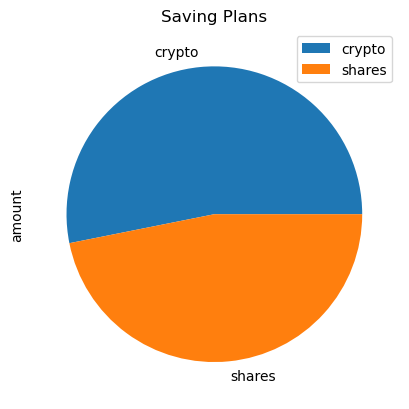

In [37]:
#Plot savings pie chart
df_savings.plot.pie(y='amount', title='Saving Plans')

In [39]:
#Emergency Fund Calculation
emergency_fund = monthly_income * 3

crypto_sav = my_total_btc + my_total_eth,
inv_sav = my_total_spy + my_total_agg

total_savings = crypto_sav + inv_sav

if total_savings > emergency_fund:
    print("Congratulations you have overachieved on your savings!")
elif total_savings == emergency_fund:
    print("Congratulations for reacihng your goal!")
elif total_savings < emergency_fund:
    print(f"{df_savings - emergency_fund} dollars away to achieve your inteded goal")

Congratulations you have overachieved on your savings!


# Part-Retirement Planning

In [40]:
#Setting start and end datetimes of 5 years worth of data
start_date = pd.Timestamp("2017-10-20", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-20", tz = "America/New_York").isoformat()

# Monte Carlo Simulation

In [44]:
#Creating the Dataframe
df_stock_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

#Organizing the Dataframe
AGG = df_stock_data[df_stock_data['symbol']== 'AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']== 'SPY'].drop('symbol', axis=1)

#Concatenate the DataFrame
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

#Displaying the data
df_stock_data.head()

AGG                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2017-10-20 04:00:00+00:00  109.30  109.405  109.26        9711  109.32   
2017-10-23 04:00:00+00:00  109.42  109.470  109.36        9208  109.40   
2017-10-24 04:00:00+00:00  109.19  109.290  109.17        8487  109.23   
2017-10-25 04:00:00+00:00  109.12  109.130  108.95       12461  108.96   
2017-10-26 04:00:00+00:00  109.00  109.229  108.98        8114  109.20   

                                                   SPY                    \
                            volume        vwap   close    high       low   
timestamp                                                                  
2017-10-20 04:00:00+00:00  2160208  109.322341  257.07  257.14  255.7744   
2017-10-23 04:00:00+00:00  2261245  109.407501  256.16  257.51  256.0200   
2017-10-24 04:00:00+00:00  1838280  109.227569  256.55  256.83  256.1500   
2017-10-25 04:00:00+00:00  3051426  109.046041  255.32  256.31  254.0000   
2017-10-26 04:00:00+00:00  2736353  109.040855  255.48  256.30  255.4800   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2017-10-20 04:00:00+00:00      196440  256.70   91210612  256.773874  
2017-10-23 04:00:00+00:00      196937  257.48   65348872  256.690670  
2017-10-24 04:00:00+00:00      193869  256.60   68551491  256.491012  
2017-10-25 04:00:00+00:00      318605  256.18  105617696  255.252015  
2017-10-26 04:00:00+00:00      178426  255.99   73883274  255.748231

In [46]:
#Configuring the Monte Carlo Simulation
mc_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [47]:
#Printing the Monte Carlo Simulation data
mc_sim.portfolio_data.head()

AGG                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2017-10-20 04:00:00+00:00  109.30  109.405  109.26        9711  109.32   
2017-10-23 04:00:00+00:00  109.42  109.470  109.36        9208  109.40   
2017-10-24 04:00:00+00:00  109.19  109.290  109.17        8487  109.23   
2017-10-25 04:00:00+00:00  109.12  109.130  108.95       12461  108.96   
2017-10-26 04:00:00+00:00  109.00  109.229  108.98        8114  109.20   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2017-10-20 04:00:00+00:00  2160208  109.322341          NaN  257.07  257.14   
2017-10-23 04:00:00+00:00  2261245  109.407501     0.001098  256.16  257.51   
2017-10-24 04:00:00+00:00  1838280  109.227569    -0.002102  256.55  256.83   
2017-10-25 04:00:00+00:00  3051426  109.046041    -0.000641  255.32  256.31   
2017-10-26 04:00:00+00:00  2736353  109.040855    -0.001100  255.48  256.30   

                                                                    \
                                low trade_count    open     volume   
timestamp                                                            
2017-10-20 04:00:00+00:00  255.7744      196440  256.70   91210612   
2017-10-23 04:00:00+00:00  256.0200      196937  257.48   65348872   
2017-10-24 04:00:00+00:00  256.1500      193869  256.60   68551491   
2017-10-25 04:00:00+00:00  254.0000      318605  256.18  105617696   
2017-10-26 04:00:00+00:00  255.4800      178426  255.99   73883274   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-10-20 04:00:00+00:00  256.773874          NaN  
2017-10-23 04:00:00+00:00  256.690670    -0.003540  
2017-10-24 04:00:00+00:00  256.491012     0.001522  
2017-10-25 04:00:00+00:00  255.252015    -0.004794  
2017-10-26 04:00:00+00:00  255.748231     0.000627

In [62]:
#Running the Monte Carlo Simulation for last 30 years
mc_data_df = pd.DataFrame(mc_sim.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 110.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 120.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 130.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 140.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 150.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 160.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 170.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 180.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 190.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 200.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 210.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 220.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 230.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 240.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 250.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 260.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 270.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 280.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 290.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 300.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 310.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 320.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 330.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 340.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 350.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 360.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 370.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 380.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 390.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 400.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 410.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 420.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 430.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 440.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 450.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 460.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 470.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 480.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 490.


C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rayde\Desktop\Homework_Unit_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

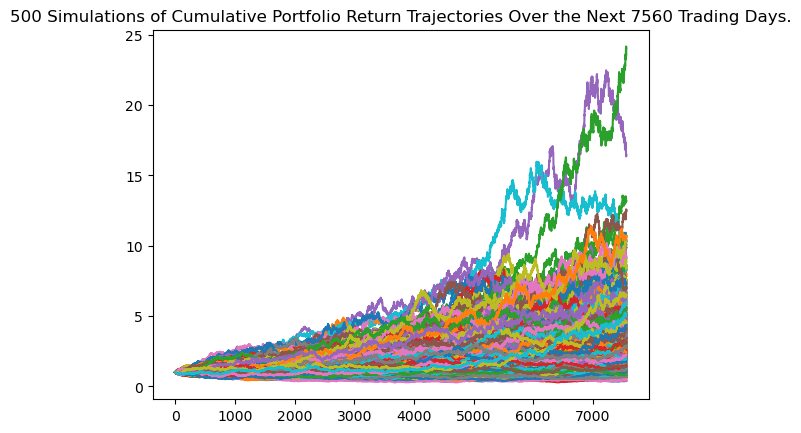

In [50]:
#Plotting Simulation Data
line_plot = mc_sim.plot_simulation()

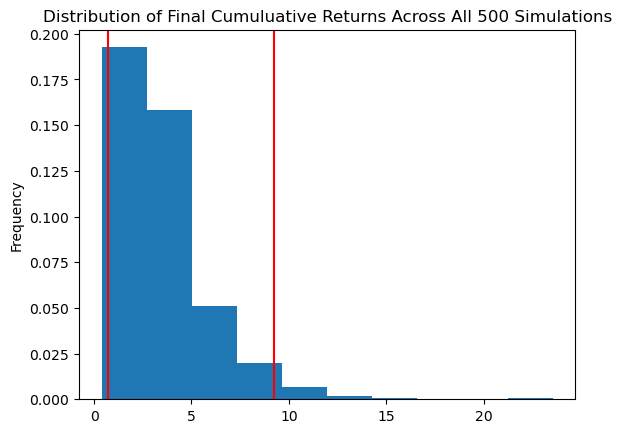

In [53]:
#Retriving Distrubution Data
dist_plot = mc_sim.plot_distribution()

In [63]:
#Retrieving the cumulative stats
stats_data = mc_data_df.iloc[-1].describe()
# Print summary statistics
print(stats_data)


count    500.000000
mean       3.718339
std        3.069809
min        0.335314
25%        1.855919
50%        2.910682
75%        4.581902
max       32.569092
Name: 7560, dtype: float64


In [65]:
#Calculating for cilower and ciupper
ci_lower_original=stats_data.quantile(0.05)
ci_upper_original=stats_data.quantile(0.95)

#Print Results
print(f"{ci_lower_original}\n{ci_upper_original}")

0.8675260496331185
336.3991821872757
